In [46]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import pandas as pd
import numpy as np
import os.path

In [47]:
file_list=['sp1','sp2','sp3']
x_col_name_in_csv="LVDT"
y_col_name_in_csv="Force"

Number_of_average_points="Auto" # Auto or number
x_axis_label="$\it{CMOD (mm)}$"
y_axis_label="$\it{Force (kN)}$"
plot_title="Average Multiple Curves"


labelfont = {'family': 'serif',
        'weight': 'normal',
        'size': 14,
        }
titlelfont= {'family': 'serif',
        'weight': 'normal',#normal
        'size': 20,
        }

In [48]:
datacsv = {}
xydata = {}
N_max_data = 0
for file in file_list:
    file_exist=os.path.exists(file+".csv")
    if file_exist:
        datacsv_read = pd.read_csv(file+".csv")
        N_max_data = max(N_max_data,len(datacsv_read))
        datacsv[file] = datacsv_read[[x_col_name_in_csv, y_col_name_in_csv]]
        xydata[file]=datacsv[file].to_numpy()

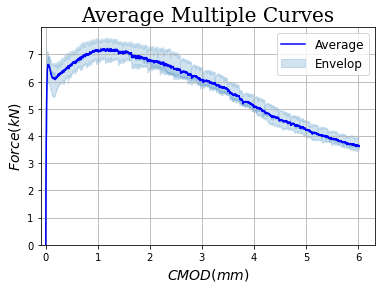

output:
[[-2.65930000e-04  0.00000000e+00]
 [ 1.48965607e-03  1.19105817e+00]
 [ 3.24524214e-03  1.66651085e+00]
 ...
 [ 6.01963870e+00  3.64147135e+00]
 [ 6.02139429e+00  3.64965601e+00]
 [ 6.02314988e+00  3.63720520e+00]]
Average curve saved at: output.csv


In [49]:
if Number_of_average_points=="Auto":
    n_points=N_max_data
else:
    n_points=Number_of_average_points
    
plot=True
axis_list=[]
for file in file_list:
    file_exist=os.path.exists(file+".csv")
    if file_exist:
        axis_list+=xydata[file],

min_max_xs = [(min(axis[:,0]), max(axis[:,0])) for axis in axis_list]

new_axis_xs = [np.linspace(min_x, max_x, n_points) for min_x, max_x in min_max_xs]
new_axis_ys = [np.interp(new_x_axis, axis[:,0], axis[:,1]) for axis, new_x_axis in zip(axis_list, new_axis_xs)]

midx = [np.mean([new_axis_xs[axis_idx][i] for axis_idx in range(len(axis_list))]) for i in range(n_points)]
midy = [np.mean([new_axis_ys[axis_idx][i] for axis_idx in range(len(axis_list))]) for i in range(n_points)]

if plot:
        i=0
        for axis in axis_list:
            #plt.plot(axis[:,0], axis[:,1], label=file_list[i],linestyle="-")
            line_fill, =plt.fill(np.append(midx, axis[:,0][::-1]),np.append(midy, axis[:,1][::-1]), color='C0', alpha=0.2,label='Envelop')
            i+=1
        line_average, = plt.plot(midx, midy, linestyle='-', color='blue',label='Average')
        
        plt.title(plot_title, fontdict=titlelfont)
        plt.xlabel(x_axis_label, fontdict=labelfont)
        plt.ylabel(y_axis_label, fontdict=labelfont)
        plt.legend(handles=[line_average, line_fill],fontsize=12,
           loc='best', shadow=False)
        
        plt.xlim(left=0)
        plt.ylim(bottom=0)
        plt.grid(True)
        
        plt.show()
        
output = np.array([[x, y] for x, y in zip(midx, midy)])
print ('output:')
print (output)
np.savetxt('output.csv', output, delimiter=',', fmt='%f')

print("Average curve saved at: output.csv");